# Data Preprocessing for Testing Set
---

Nhiệm vụ của phần này là làm sạch dữ liệu tập test của dataset

## IMPORT

In [1]:
# Import các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import math
import numpy as np
from sklearn.manifold import TSNE
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import linregress

## ĐỌC DỮ LIỆU

In [2]:
# Google Colab
url = "https://raw.githubusercontent.com/uyen312/Project_PTDLTM/main/Data/test.csv"
df = pd.read_csv(url)

# VSCode
# df = pd.read_csv("../Data/dataset.csv")

In [3]:
df.head(5)

,id,sale_date,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,area,city,...,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket
0,200000,2022-12-15,4.0,,new,2025,47.4794,-122.2212,25,RENTON,...,0,0,0,0,0,0,0,0,0,J
1,200001,2000-10-15,2.0,,new,2025,47.5778,-122.0270,69,SAMMAMISH,...,0,0,0,0,0,0,0,0,0,O
2,200002,2004-06-15,1.0,,nochg,2025,47.5632,-122.1623,31,BELLEVUE,...,3,0,3,3,0,2,0,0,0,R
3,200003,2009-11-15,1.0,,nochg,2025,47.6911,-122.3469,6,SEATTLE,...,0,0,0,0,0,0,0,0,0,B
4,200004,1999-06-15,1.0,,reno - before,1999,47.4001,-122.4146,100,KING COUNTY,...,0,2,4,0,3,0,0,0,0,H


## DATA PREPROCESSING

### Dữ liệu có bao nhiêu dòng, cột

In [4]:
df.shape

(200000, 46)

### Thông tin về các dòng dữ liệu

#### Ý nghĩa từng dòng dữ liệu

- Mỗi dòng là đại diện cho thông tin về một căn nhà tại thời điểm được bán ra bao gồm các đặc điểm như vị trí, diện tích, tiện ích, giá bán, ...

- Không có dòng nào có ý nghĩa khác với các dòng còn lại.

#### Kiểm tra các dòng dữ liệu trùng lặp

In [5]:
duplicate_rows = df.duplicated().sum()
duplicate_rows

np.int64(0)

Dữ liệu không có các dòng trùng lặp

### Thông tin về các cột dữ liệu
Dữ liệu có các cột sau

In [6]:
df.columns

Index(['id', 'sale_date', 'sale_nbr', 'sale_warning', 'join_status',
       'join_year', 'latitude', 'longitude', 'area', 'city', 'zoning',
       'subdivision', 'present_use', 'land_val', 'imp_val', 'year_built',
       'year_reno', 'sqft_lot', 'sqft', 'sqft_1', 'sqft_fbsmt', 'grade',
       'fbsmt_grade', 'condition', 'stories', 'beds', 'bath_full', 'bath_3qtr',
       'bath_half', 'garb_sqft', 'gara_sqft', 'wfnt', 'golf', 'greenbelt',
       'noise_traffic', 'view_rainier', 'view_olympics', 'view_cascades',
       'view_territorial', 'view_skyline', 'view_sound', 'view_lakewash',
       'view_lakesamm', 'view_otherwater', 'view_other', 'submarket'],
      dtype='object')

#### Ý nghĩa của các cột dữ liệu

Mỗi cột có ý nghĩa sau:

| Tên cột           | Ý nghĩa |
|-------------------|---------|
| id                | Mã định danh duy nhất của căn nhà |
| sale_date         | Ngày diễn ra giao dịch bán nhà |
| sale_nbr          | Số lần căn nhà này đã được bán |
| sale_warning      | Cảnh báo liên quan đến giao dịch (bán bất thường, nội bộ, tịch thu,...) |
| join_status       | Tình trạng khi căn nhà được ghi nhận vào hệ thống |
| join_year         | Năm mà căn nhà được ghi nhận vào hệ thống |
| latitude          | Vĩ độ |
| longitude         | Kinh độ |
| area              | Diện tích vùng/quận nơi nhà tọa lạc |
| city              | Thành phố |
| zoning            | Phân vùng quy hoạch sử dụng đất |
| subdivision       | Tên khu dân cư hoặc tiểu khu |
| present_use       | Mục đích sử dụng hiện tại (mã số) |
| land_val          | Giá trị đất theo đánh giá |
| imp_val           | Giá trị phần công trình (nhà, hạ tầng) |
| year_built        | Năm xây dựng ban đầu |
| year_reno         | Năm cải tạo (nếu có) |
| sqft_lot          | Diện tích lô đất (square feet) |
| sqft              | Tổng diện tích sàn sử dụng |
| sqft_1            | Diện tích tầng 1 |
| sqft_fbsmt        | Diện tích tầng hầm hoàn thiện |
| grade             | Đánh giá chất lượng tổng thể |
| fbsmt_grade       | Đánh giá tầng hầm hoàn thiện |
| condition         | Tình trạng tổng thể của ngôi nhà |
| stories           | Số tầng của ngôi nhà |
| beds              | Số phòng ngủ |
| bath_full         | Số phòng tắm đầy đủ |
| bath_3qtr         | Số phòng tắm 3/4 |
| bath_half         | Số phòng tắm 1/2 (chỉ có bồn rửa & toilet) |
| garb_sqft         | Diện tích nhà để rác/nhà kho |
| gara_sqft         | Diện tích garage (nhà để xe) |
| wfnt              | Có nằm gần mặt nước không |
| golf              | Có gần sân golf không |
| greenbelt         | Có gần khu xanh (công viên, hành lang sinh thái không |
| noise_traffic     | Mức độ tiếng ồn do giao thông |
| view_rainier      | Tầm nhìn ra núi Rainier |
| view_olympics     | Tầm nhìn ra dãy núi Olympics |
| view_cascades     | Tầm nhìn ra dãy núi Cascades |
| view_territorial  | Tầm nhìn toàn cảnh |
| view_skyline      | Tầm nhìn đường chân trời thành phố |
| view_sound        | Tầm nhìn ra biển Sound |
| view_lakewash     | Tầm nhìn ra hồ Washington |
| view_lakesamm     | Tầm nhìn ra hồ Sammamish |
| view_otherwater   | Tầm nhìn ra các nguồn nước khác |
| view_other        | Tầm nhìn khác |
| submarket         | Phân khu thị trường nơi nhà tọa lạc |

Cột `id` chỉ mang tính định danh và không chứa thông tin đặc trưng về bất động sản, không mang lại giá trị gì cho mô hình học máy nên ta sẽ xóa đi để đảm bảo dữ liệu đầu vào chỉ gồm các đặc trưng liên quan.

In [7]:
df.drop(columns=['id'], inplace=True)

#### Kiểm tra kiểu dữ liệu của mỗi cột
Kiểu dữ liệu hiện tại của các cột

In [8]:
df.dtypes

,0
sale_date,object
sale_nbr,float64
sale_warning,object
join_status,object
join_year,int64
latitude,float64
longitude,float64
area,int64
city,object
zoning,object


Cột có dữ liệu chưa phù hợp là `sale_date`, ta sẽ chuyển về kiểu dữ liệu phù hợp là datetime.

In [9]:
df['sale_date'] = pd.to_datetime(df['sale_date'], errors='coerce')

Các cột có kiểu số nguyên nhưng mang ý nghĩa phân loại, như các cột nhị phân (ví dụ: `golf`, `greenbelt`), các cột phân loại có thứ tự (như `view_*`) hoặc các cột khác như `grade`, `fbsmt_grade`, ..., tổng cộng tất cả là 19 cột được ép kiểu sang category. Hai cột định tính là `city`, `submarket`,   `join_status` có tính chất phân loại nên ta cũng ép kiểu sang category. Việc này giúp phản ánh đúng bản chất dữ liệu, tối ưu bộ nhớ, hỗ trợ mô hình hóa và trực quan hóa chính xác hơn.

In [10]:
cols_to_convert = ['grade', 'fbsmt_grade', 'condition', 'wfnt','golf', 'greenbelt', 'present_use', 'join_year', 'noise_traffic', 'view_rainier',
                   'view_olympics',  'view_cascades', 'view_territorial', 'view_skyline', 'view_sound', 'view_lakewash', 'view_lakesamm',
                   'view_otherwater', 'view_other', 'city', 'submarket', 'join_status']
df[cols_to_convert] = df[cols_to_convert].astype('category')

Kiểm tra lại dữ liệu các cột

In [11]:
df.dtypes

,0
sale_date,datetime64[ns]
sale_nbr,float64
sale_warning,object
join_status,category
join_year,category
latitude,float64
longitude,float64
area,int64
city,category
zoning,object


Các cột đã có kiểu dữ liệu phù hợp.

#### Sự phân bố dữ liệu của các cột có kiểu định lượng
Các cột có dữ liệu định lượng

In [12]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
print('Các cột có kiểu dữ liệu định lượng: ')
for col_name in numerical_columns:
    print(col_name)

Các cột có kiểu dữ liệu định lượng: 
sale_nbr
latitude
longitude
area
land_val
imp_val
year_built
year_reno
sqft_lot
sqft
sqft_1
sqft_fbsmt
stories
beds
bath_full
bath_3qtr
bath_half
garb_sqft
gara_sqft


Dữ liệu định lượng được kiểm tra tính hợp lệ để loại bỏ các giá trị không logic (như diện tích âm, số tầng bằng 0). Việc này giúp đảm bảo độ tin cậy cho quá trình phân tích và huấn luyện mô hình.

In [13]:
# Điều kiện kiểm tra hợp lệ
invalid_conditions = {
    'sale_nbr':      df['sale_nbr'] < 0,
    'latitude':      (df['latitude'] < 45) | (df['latitude'] > 49),    # Seattle khoảng 47.xxx
    'longitude':     (df['longitude'] < -124) | (df['longitude'] > -121),  # Seattle khoảng -122.xxx
    'area':          df['area'] <= 0,
    'land_val':      df['land_val'] < 0,
    'imp_val':       df['imp_val'] < 0,
    'year_built':    (df['year_built'] < 1500) | (df['year_built'] > 2025),
    'year_reno':     (df['year_reno'] > 2025),  # Không cần kiểm tra <0 vì nhiều căn chưa sửa
    'sqft_lot':      df['sqft_lot'] <= 0,
    'sqft':          df['sqft'] <= 0,
    'sqft_1':        df['sqft_1'] < 0,
    'sqft_fbsmt':    df['sqft_fbsmt'] < 0,
    'stories':       df['stories'] < 1,
    'beds':          df['beds'] < 0,
    'bath_full':     df['bath_full'] < 0,
    'bath_3qtr':     df['bath_3qtr'] < 0,
    'bath_half':     df['bath_half'] < 0,
    'garb_sqft':     df['garb_sqft'] < 0,
    'gara_sqft':     df['gara_sqft'] < 0,
}

# In ra số lượng dòng không hợp lệ cho mỗi cột
for col, condition in invalid_conditions.items():
    count = condition.sum()
    if count > 0:
        print(f"{col}: {count} giá trị không hợp lệ")

sqft_lot: 1 giá trị không hợp lệ


Một giá trị không hợp lệ được phát hiện ở cột sqft_lot (diện tích sàn nhỏ hơn 0). Dòng dữ liệu này dù sai nhưng vẫn sẽ dữ liệu ở tập dữ liệu Test.

##### Tính toán các giá trị thống kê và xử lý giá trị thiếu

Với mỗi cột có kiểu dữ liệu định lượng, thực hiện tính toán các giá trị thống kê cơ bản sau:
- Phần trăm (từ 0 đến 100) của giá trị thiếu
- Giá trị nhỏ nhất (Min)
- Tứ phân vị dưới (Lower quartile)
- Trung vị (Median)
- Tứ phân vị trên (Upper quartile)
- Giá trị lớn nhất (Max)

Các giá trị được làm tròn đến chữ số thập phân thứ nhất.

In [14]:
# Chọn ra những cột có kiểu định lượng
numeric_cols = df.select_dtypes(include=['number']).columns

# Tính toán các giá trị thống kê
def missing_ratio(series):
    return series.isnull().mean() * 100

def lower_quartile(series):
    return series.quantile(0.25)

def median(series):
    return series.median()

def upper_quartile(series):
    return series.quantile(0.75)

min_vals = df[numeric_cols].min()
max_vals = df[numeric_cols].max()
lower_quartiles = df[numeric_cols].apply(lower_quartile)
medians = df[numeric_cols].median()
upper_quartiles = df[numeric_cols].apply(upper_quartile)

# Tạo một DataFrame chứa các giá trị thống kê của những cột định lượng
num_col_info_df = pd.DataFrame({
    "Tỷ lệ giá trị thiếu": df[numeric_cols].apply(missing_ratio).round(1),
    "Giá trị nhỏ nhất": min_vals.round(1),
    "Tứ phân vị dưới": lower_quartiles.round(1),
    "Trung vị": medians.round(1),
    "Tứ phân vị trên": upper_quartiles.round(1),
    "Giá trị lớn nhất": max_vals.round(1)
}).T

# In ra
num_col_info_df = num_col_info_df.T  # Đảo chiều
num_col_info_df

,Tỷ lệ giá trị thiếu,Giá trị nhỏ nhất,Tứ phân vị dưới,Trung vị,Tứ phân vị trên,Giá trị lớn nhất
sale_nbr,21.2,1.0,1.0,2.0,3.0,15.0
latitude,0.0,47.2,47.4,47.6,47.7,47.8
longitude,0.0,-122.5,-122.3,-122.2,-122.1,-121.2
area,0.0,1.0,26.0,48.0,71.0,100.0
land_val,0.0,0.0,232000.0,379000.0,598000.0,12115000.0
imp_val,0.0,0.0,281000.0,409000.0,598000.0,8579000.0
year_built,0.0,1900.0,1953.0,1978.0,2001.0,2025.0
year_reno,0.0,0.0,0.0,0.0,0.0,2024.0
sqft_lot,0.0,0.0,5000.0,7426.0,10213.0,9539640.0
sqft,0.0,82.0,1460.0,1970.0,2610.0,12000.0


**Nhận xét**: Một cột chứa giá trị thiếu là `sale_nbr` với tỷ lệ lên đến 21%.

Vì không có thông tin về số lần bất động sản đã được bán trước đó, ta tạm giả định rằng những dòng thiếu dữ liệu ở cột sale_nbr là các trường hợp chưa từng được bán (tức là nhà mới hoàn toàn). Do đó, ta sẽ:

- Điền các giá trị thiếu trong sale_nbr bằng 0.

- Đồng thời tạo thêm một cột mới (sale_nbr_missing) để đánh dấu các dòng mà dữ liệu ban đầu bị thiếu, nhằm giữ lại thông tin này cho các bước phân tích và mô hình hóa sau.

In [15]:
df['sale_nbr_missing'] = df['sale_nbr'].isnull().astype(int)

df['sale_nbr'] = df['sale_nbr'].fillna(0)

##### Sự phân bố dữ liệu

Trực quan hóa phân bố của các cột kiểu numerical trong bộ dữ liệu linh hoạt phù hợp với bản chất của từng cột (rời rạc, liên tục,...). Trong đó:

- Loại bỏ cột ID vì đây là định danh duy nhất, không mang thông tin phân phối hay giá trị thống kê

- Nếu số lượng giá trị duy nhất ít hơn hoặc bằng 20 thì xác định đây là dữ liệu rời rạc

- Nếu dữ liệu lệch phải nghiêm trọng (skewness > 1) và không có gì trị âm thì dùng `np.log1p()` để nén các giá trị lớn đồng thời làm mượt biểu đồ histogram

- Nếu dữ liệu không quá lệch hoặc không dùng được log thì dùng `clip(0.01, 0.99)` để loại bỏ outliers ảnh hưởng đến biểu đồ để tránh việc vài giá trị lớn làm "dẹt" histogram

In [16]:
def smart_plot(df, columns, ncols=3):
    cols = [col for col in columns if col.lower() != 'id']
    nrows = math.ceil(len(cols) / ncols)
    plt.figure(figsize=(ncols*5, nrows*3))

    for i, col in enumerate(cols):
        plt.subplot(nrows, ncols, i+1)

        nunique = df[col].nunique()
        if pd.api.types.is_numeric_dtype(df[col]):
            skew = df[col].skew()
            min_val = df[col].min()

            if nunique <= 20:
                sns.countplot(x=col, data=df, order=df[col].value_counts().index)
            elif skew > 1 and min_val >= 0:
                sns.histplot(np.log1p(df[col]), bins=50)
                plt.xlabel(f"log1p({col})")
            else:
                # Clip để giảm ảnh hưởng của outliers (1%–99%)
                low = df[col].quantile(0.01)
                high = df[col].quantile(0.99)
                clipped = df[col].clip(lower=low, upper=high)
                sns.histplot(clipped, bins=50)
                plt.xlabel(f"{col} (clipped)")
        else:
            sns.countplot(x=col, data=df, order=df[col].value_counts().index)

        plt.title(f'Phân bố {col}')

    plt.tight_layout()
    plt.show()

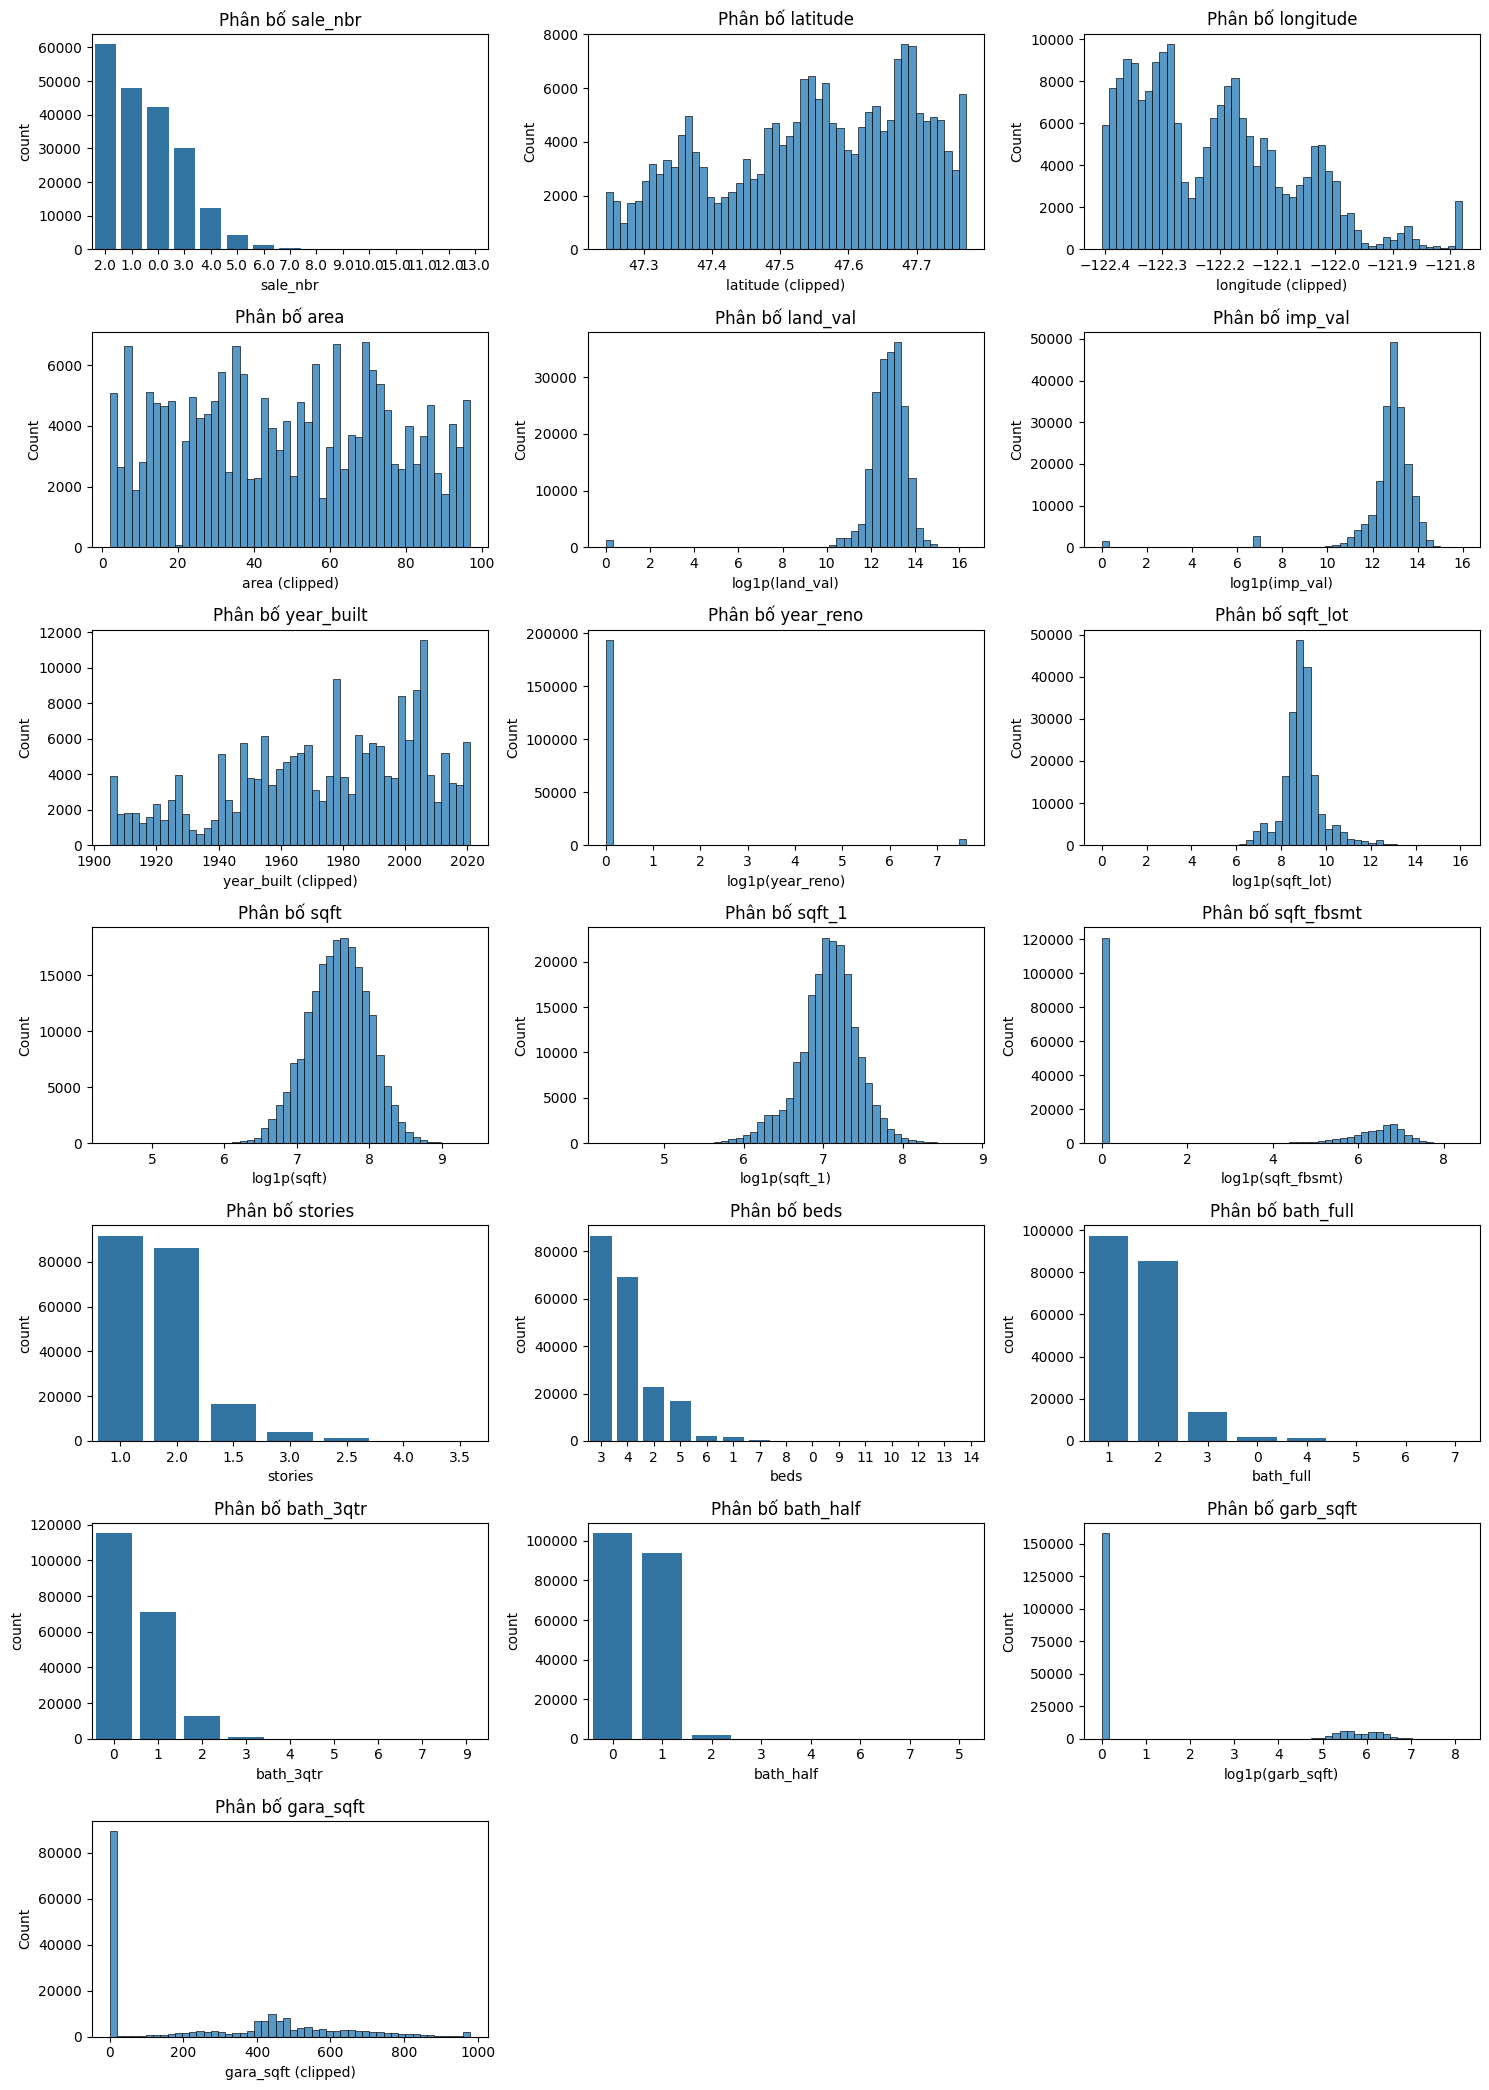

In [17]:
smart_plot(df, numerical_columns)

**Nhận xét**

- Cột mục tiêu `sale_price` rất lệch phải cho thấy có nhiều giá trị nhỏ và rất ít giá trị cực lớn. Sau khi log1p(), phân phối trở nên gần phân phối chuẩn giúp mô hình học dễ hơn $\Rightarrow$ nên dùng `log1p(sale_price)` khi train và `expm1()` để chuyển kết quả ngược lại giúp tránh việc model bị chi phối bởi một vài căn nhà giá "khủng".

- Cột `year_built` phân bố khá đều nhưng cột `year_reno` rất lệch (nhiều giá trị 0) cho thấy rất nhiều căn nhà chưa từng được cải tạo

- Cột `latitude` và `longtitude` có phân cụm, điều này cho thấy rằng dữ liệu đến từ nhiều khu vực khác nhau, giúp mô hình học được hiệu quả hơn

##### Xử lý dữ liệu lỗi hoặc bất thường

In [18]:
# Hàm đếm outlier dựa trên quy tắc Tukey
def count_outliers(data, column):
    Q1 = data[column].quantile(0.25)  # Phân vị thứ 25
    Q3 = data[column].quantile(0.75)  # Phân vị thứ 75
    IQR = Q3 - Q1                    # Khoảng tứ phân vị (IQR)
    lower_bound = Q1 - 1.5 * IQR     # Ngưỡng dưới
    upper_bound = Q3 + 1.5 * IQR     # Ngưỡng trên
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    # Kiểm tra nếu ngưỡng dưới âm và điều chỉnh
    if lower_bound < 0:
        lower_bound = 0  # Đặt lại ngưỡng dưới bằng 0 vì nếu mang giá trị âm sẽ không hợp lý với dữ liệu

    return len(outliers)

def count_outliers_for_all_columns(data, numerical_columns):
    outliers_info = {}
    for column in numerical_columns:
        outlier_count = count_outliers(data, column)

        # Lưu kết quả vào info
        outliers_info[column] = {
            'Số giá trị ngoại lai': outlier_count,
            'Tỷ lệ giá trị ngoại lai': outlier_count / data.shape[0]
        }

    return outliers_info

# In kết quả
outliers_data = pd.DataFrame(count_outliers_for_all_columns(df, numerical_columns))
outliers_data = outliers_data.T  # Đảo chiều
outliers_data

,Số giá trị ngoại lai,Tỷ lệ giá trị ngoại lai
sale_nbr,18571.0,0.092855
latitude,0.0,0.000000
longitude,2581.0,0.012905
area,0.0,0.000000
land_val,7408.0,0.037040
imp_val,13836.0,0.069180
year_built,0.0,0.000000
year_reno,6095.0,0.030475
sqft_lot,21147.0,0.105735
sqft,4439.0,0.022195


**Nhận xét**:
Nhiều biến định lượng xuất hiện giá trị ngoại lai với tỷ lệ khác nhau.

Một số cột như `garb_sqft` và `sqft_lot` có tỷ lệ ngoại lai cao (trên 10%), cho thấy sự phân bố không đều hoặc tồn tại các giá trị bất thường lớn. Các cột như `sale_price`, `sale_nbr`và `imp_val` có tỷ lệ ngoại lai từ 5 - 10% trong khi các cột như `longtitude`, `land_val`, `year_reno`, `sqft`, `sqft_1`, `sqft_fbsmt` và `beds` đạt từ 1 - 5% . Các cột còn lại có tỷ lệ ngoại lai rất thấp, gần như không ảnh hưởng đến phân tích.

Việc xử lý ngoại lai là cần thiết để đảm bảo độ ổn định và độ chính xác cho các mô hình sau này.

- Cột `sale_price` có ngoại lai vì giá nhà có thể cao, cột này không xử lý ở đây mà dành cho phần mô hình học máy.

- Các `sqft`, `sqft_1`, `sqft_fbsmt` và `beds` có giá trị ngoại lai là hợp lý vì có các căn hộ diện tích rất lớn như biệt thự, cũng sẽ có nhiều phòng ngủ. Cột `year_reno` có giá trị ngoại lai là do nhiều căn nhà không phải sửa chữa, các căn có sửa chữa ở các năm khác nhau nên cũng hợp lý. Cột `land_val` có giá trị đất cao sẽ thường xảy ra ở các khu vực trung tâm nên ngoại lai hợp lý. Tất cả các cột này có giá trị ngoại lai rất thấp từ 1% - 5%, ảnh hưởng nhỏ đến mô hình nên ta sẽ giữ lại và không xử lý gì thêm để tránh mất thông tin có giá trị.

- Cột `garb_sqft` có tỷ lệ ngoại lai rất cao (20.9%). Diện tích gara phụ không thể quá lớn như vậy, kích thước lớn bất thường là không hợp lý trong thực tế có thể là do lỗi nhập hoặc sai đơn vị cho nên ta sẽ cắt ngưỡng trên.

In [19]:
# Tính ngưỡng trên theo IQR
Q1 = df['garb_sqft'].quantile(0.25)
Q3 = df['garb_sqft'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Cắt ngưỡng: thay giá trị quá lớn bằng ngưỡng trên
df['garb_sqft_clipped'] = df['garb_sqft'].clip(upper=upper_bound)

- Cột `sqft_lot` có ngoại lai trên 10%, một số lô đất rất lớn có thể hợp lý nên cột này ta sẽ lựa chọn `log-transform` để giảm ảnh hưởng của phân phối lệch thay vì phải loại bỏ.

In [20]:
# Tạo biến mới với log-transform
df['sqft_lot_log'] = np.log1p(df['sqft_lot'])

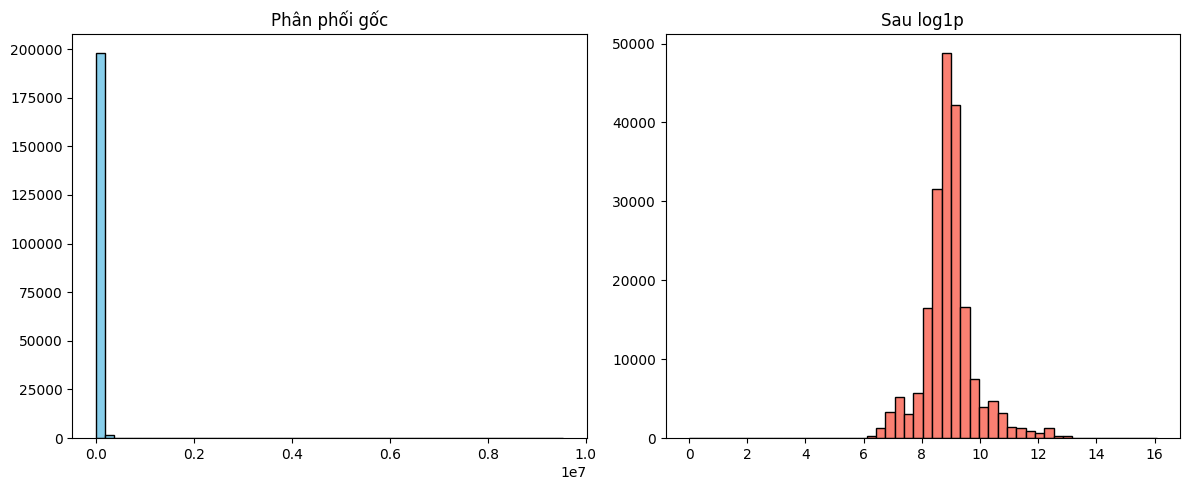

In [21]:
plt.figure(figsize=(12, 5))

# Biểu đồ phân phối gốc
plt.subplot(1, 2, 1)
plt.hist(df['sqft_lot'], bins=50, color='skyblue', edgecolor='black')
plt.title('Phân phối gốc')

# Biểu đồ phân phối sau log-transform
plt.subplot(1, 2, 2)
plt.hist(df['sqft_lot_log'], bins=50, color='salmon', edgecolor='black')
plt.title('Sau log1p')

plt.tight_layout()
plt.show()

- Hai cột `sale_nbr` và `imp_val` là các cột có giá trị ngoại lai nhưng phản ảnh đúng thực tế  giao dịch ở vùng trung tâm có thể cao hơn, ... nên các cột này ta cũng giữ lại và xử lý bằng `log-transform`.

In [22]:
# Áp dụng log1p (log(1 + x))
df['sale_nbr_log']   = np.log1p(df['sale_nbr'])
df['imp_val_log']    = np.log1p(df['imp_val'])

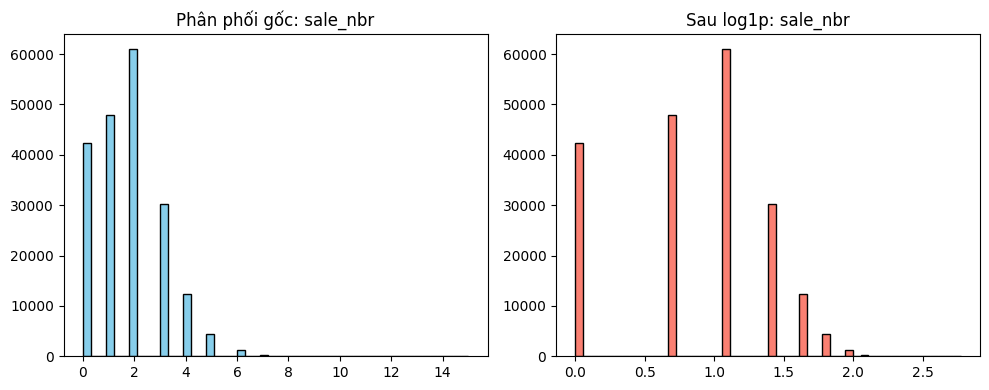

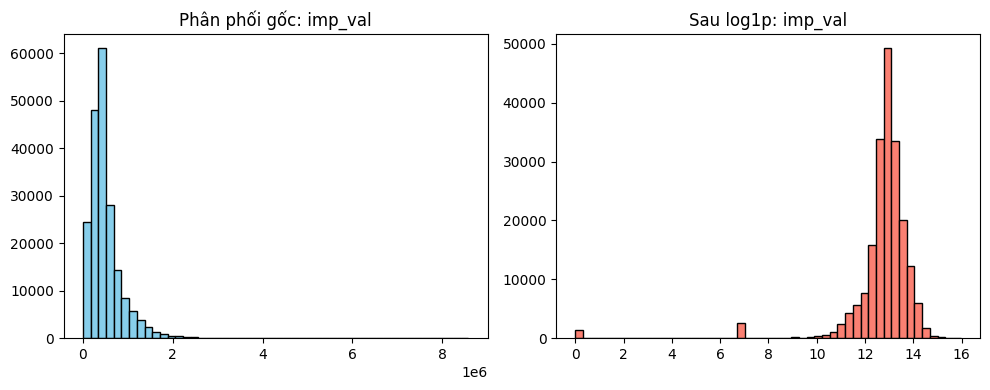

In [23]:
cols = ['sale_nbr', 'imp_val']
for col in cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Phân phối gốc: {col}')

    plt.subplot(1, 2, 2)
    plt.hist(np.log1p(df[col]), bins=50, color='salmon', edgecolor='black')
    plt.title(f'Sau log1p: {col}')
    plt.tight_layout()
    plt.show()

Phân phối của cột `sale_nbr` và `imp_val` dù đã log-transform nhưng vẫn còn rất lệch. Ta sẽ thực hiện chuẩn hóa sau khi chia train/valid/test để tránh rò rỉ dữ liệu.

#### Sự phân bố dữ liệu của các cột có kiểu định tính
Các cột có kiểu dữ liệu định tính

In [24]:
categorical_columns = df.select_dtypes(exclude=['number']).columns.tolist()
print('Các cột có kiểu dữ liệu định tính: ')
for col_name in categorical_columns:
    print(col_name)

Các cột có kiểu dữ liệu định tính: 
sale_date
sale_warning
join_status
join_year
city
zoning
subdivision
present_use
grade
fbsmt_grade
condition
wfnt
golf
greenbelt
noise_traffic
view_rainier
view_olympics
view_cascades
view_territorial
view_skyline
view_sound
view_lakewash
view_lakesamm
view_otherwater
view_other
submarket


#### Tỉ lệ phần trăm các giá trị bị thiếu trong mỗi cột

Với mỗi cột có kiểu dữ liệu định tính, thực hiện tính toán phần trăm (từ 0 đến 100) của giá trị thiếu

Các giá trị được làm tròn đến chữ số thập phân thứ nhất.

In [25]:
# Chọn ra các cột định tính
categorical_cols = df.select_dtypes(exclude=['number']).columns

# Hàm tính tỷ lệ giá trị thiếu
def missing_ratio(series):
    return ((series.isnull()) | (series.astype(str).str.strip() == "")).mean() * 100
# Tạo DataFrame thống kê
categorical_info_df = pd.DataFrame({
    "Tỷ lệ giá trị thiếu (%)": df[categorical_cols].apply(missing_ratio).round(1),
}).T

# In kết quả
categorical_info_df_T = categorical_info_df.T  # Đảo chiều
categorical_info_df_T

,Tỷ lệ giá trị thiếu (%)
sale_date,0.0
sale_warning,90.3
join_status,0.0
join_year,0.0
city,0.0
zoning,0.0
subdivision,8.8
present_use,0.0
grade,0.0
fbsmt_grade,0.0


**Nhận xét**: Ba cột có giá trị thiếu là `sale_warning` (90.3%), `subdivision` (8.8%) và `submarket` (0.9%)

Cột `sale_warning` có tỷ lệ thiếu quá cao tận 90%, chủ yếu là các dòng trống. Các dạng giá trị cũng không đồng nhất, nên ta loại bỏ cột này để tránh nhiễu và giảm độ phức tạp của mô hình.

Cột `submarket` có tỉ lệ thiếu cực kỳ thấp là 0.9%, ta sẽ điền mode (giá trị phổ biến nhất) để đảm bảo tính nhất quán và không làm ảnh hưởng đến phân phối dữ liệu.

Cột `subdivision` tuy tỷ lệ thiếu không quá cao (8.8%) nhưng vẫn đáng kể, việc loại bỏ các dòng chứa giá trị thiếu có thể làm mất thông tin quan trọng ở các đặc trưng khác. Do đó, ta lựa chọn điền giá trị thiếu bằng 'unknown' là một nhãn đặc biệt đại diện cho trường hợp không có thông tin ban đầu. Từ đó ta có thể:

- Giữ lại toàn bộ dữ liệu gốc để phục vụ huấn luyện mô hình học máy.

- Giữ nguyên tín hiệu về sự thiếu thông tin, vì 'unknown' sẽ trở thành một lớp phân loại riêng, cho phép mô hình học được sự khác biệt này.

- Tránh gây sai lệch phân phối hoặc mất mát dữ liệu không cần thiết.

In [26]:
df['subdivision'] = df['subdivision'].fillna('unknown')

mode_submarket = df['submarket'].mode()[0]
df['submarket'] = df['submarket'].fillna(mode_submarket)

df.drop(columns=['sale_warning'], inplace=True)

if 'sale_warning' in categorical_cols:
    categorical_cols = categorical_cols.drop('sale_warning')

#### Số giá trị phân biệt của mỗi cột


Với một cột dữ liệu định tính, thực hiện tính toán:
- Số giá trị phân biệt cho từng cột
- Giá trị xuất hiện nhiều nhất (mode): Tìm giá trị phổ biến nhất trong cột (nếu có nhiều giá trị bằng nhau, chọn ngẫu nhiên một giá trị).
- Tần suất xuất hiện của giá trị phổ biến nhất: Đếm số lần xuất hiện của giá trị phổ biến nhất.

In [27]:
# Hàm tính giá trị phổ biến nhất (mode) và tần suất của nó
def mode_value(series):
    if series.mode().empty:
        return None  # Nếu không có mode
    return series.mode()[0]

def mode_frequency(series):
    if series.mode().empty:
        return 0  # Nếu không có mode
    return (series == series.mode()[0]).sum()

# Tạo DataFrame thống kê
categorical_info_df = pd.DataFrame({
    "Số lượng giá trị phân biệt": df[categorical_cols].nunique(),
    "Giá trị phổ biến nhất": df[categorical_cols].apply(mode_value),
    "Tần suất của giá trị phổ biến nhất": df[categorical_cols].apply(mode_frequency)
}).T

# In kết quả
categorical_info_df_T = categorical_info_df.T  # Đảo chiều
categorical_info_df_T

,Số lượng giá trị phân biệt,Giá trị phổ biến nhất,Tần suất của giá trị phổ biến nhất
sale_date,316,2025-03-15 00:00:00,1436
join_status,8,nochg,126519
join_year,2,2025,187848
city,41,SEATTLE,59213
zoning,501,NR3,28886
subdivision,10392,unknown,17550
present_use,3,2,183197
grade,13,7,79320
fbsmt_grade,14,0,120882
condition,5,3,117823


**Nhận xét:**

Một số cột như `wfnt`, `golf`, `greenbelt` và các cột `view_*` có giá trị phổ biến là 0, chiếm tỉ lệ áp đảo, cho thấy phần lớn các căn nhà không có các đặc điểm này. Những cột này mang tính nhị phân hoặc phân loại lệch mạnh, cần xem xét khi dùng cho mô hình để tránh gây mất cân bằng.

Cột `present_use` có 3 giá trị, nhưng phân phối không đồng đều (một giá trị chiếm ưu thế). Cột `noise_traffic` có 4 mức nhưng bị lệch mạnh về giá trị 0. Cột `fbsmt_grade` có 13 mức, với giá trị 0 chiếm hơn 60%, phản ánh tình trạng tầng hầm chưa hoàn thiện.

Ngược lại, các cột như `city`, `zoning`, `subdivision` và `submarket` có số lượng giá trị phân biệt lớn, thể hiện sự đa dạng trong khu vực, quy hoạch và phân khu thị trường.

Cột `join_year` có phân phối cực lệch về năm 2025. Do sự mất cân bằng này và số lượng giá trị thấp, nên chuyển thành biến phân loại nhị phân để mô hình dễ học và tránh hiểu nhầm khoảng cách số học giữa các năm.

Các cột phân loại có phân phối cân đối hơn như `grade`, `condition`, `join_status` có phân phối tương đối cân bằng.

Cột `join_year` chỉ có hai giá trị là 1999 (6%) và 2025 (94%). Do phân phối quá lệch và không mang tính liên tục, ta mã hóa thành một biến nhị phân is_2025 với giá trị 1 tương ứng với năm 2025.

In [28]:
df['is_2025'] = (df['join_year'] == 2025).astype(int).astype('category')

#### Sự phân bố dữ liệu

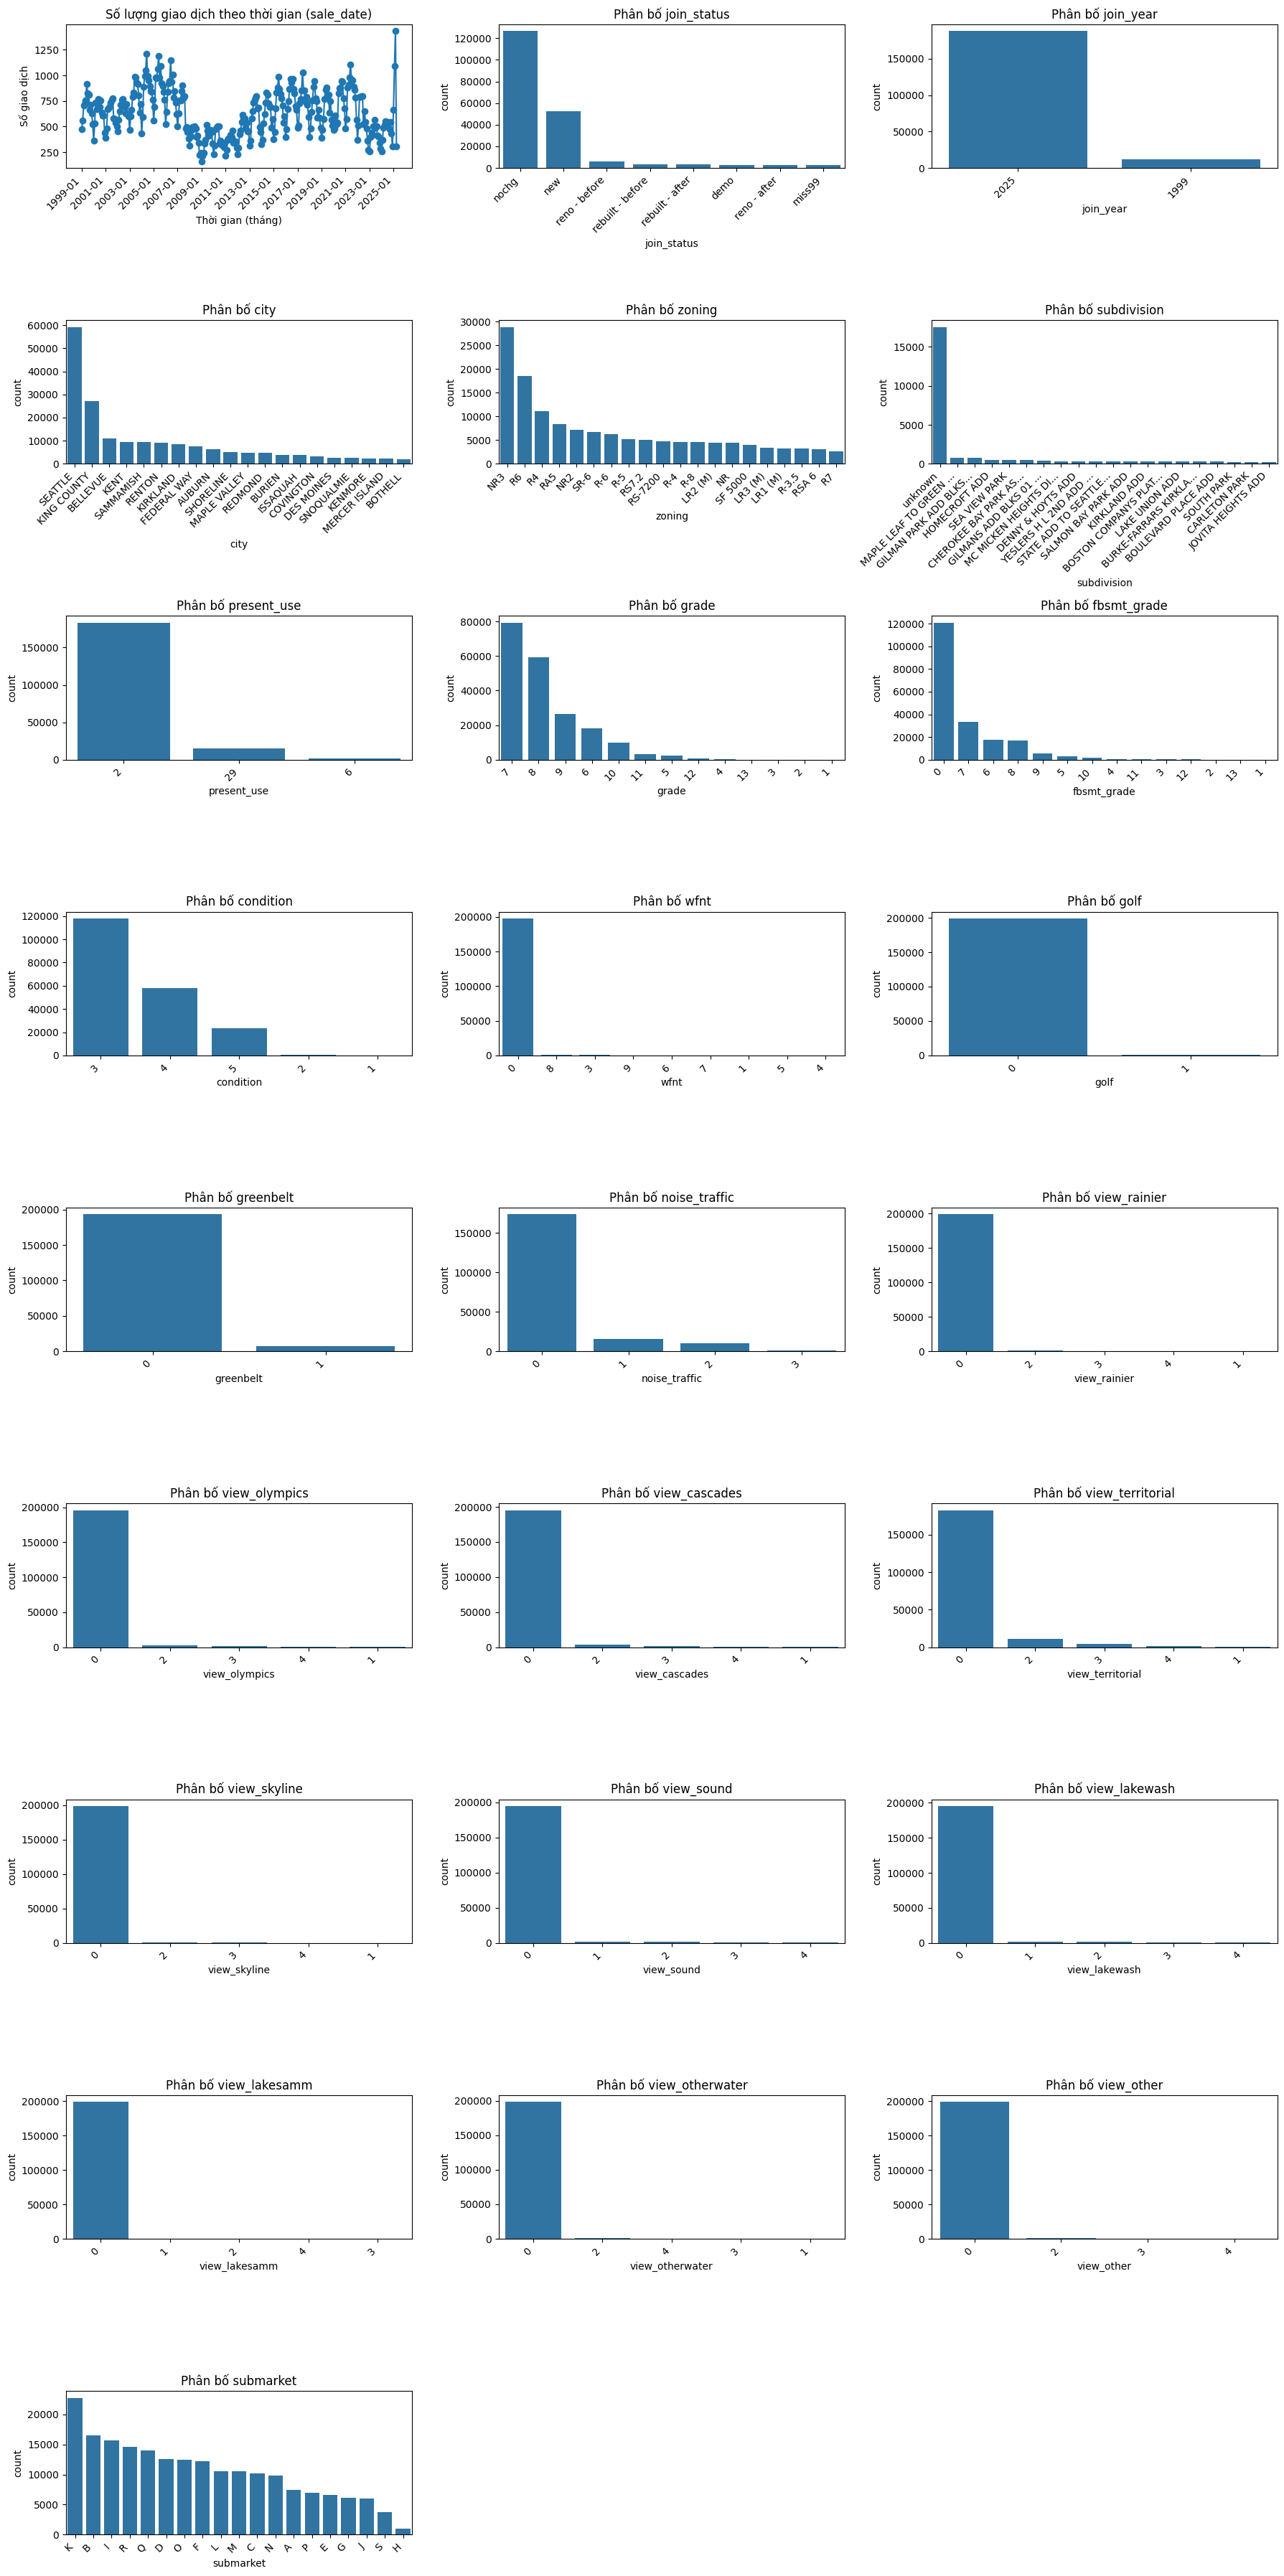

In [29]:
def plot_categorical_distribution(df, categorical_columns, datetime_col='sale_date',
                                                 ncols=3, top_n=20, max_label_len=20, step=24):
    # Convert datetime_col sang datetime
    df[datetime_col] = pd.to_datetime(df[datetime_col], errors='coerce')
    df['sale_month'] = df[datetime_col].dt.to_period('M').astype(str)

    # Các cột phân loại khác
    other_cols = [col for col in categorical_columns if col.lower() != 'id' and col != datetime_col]

    total_plots = 1 + len(other_cols)
    nrows = math.ceil(total_plots / ncols)
    plt.figure(figsize=(ncols * 6, nrows * 4))

    plot_index = 1

    # === Subplot đầu tiên: sale_date theo tháng (lineplot) ===
    plt.subplot(nrows, ncols, plot_index)
    monthly_counts = df['sale_month'].value_counts().sort_index()

    plt.plot(monthly_counts.index, monthly_counts.values, marker='o')
    plt.title(f"Số lượng giao dịch theo thời gian ({datetime_col})")
    plt.xlabel("Thời gian (tháng)")
    plt.ylabel("Số giao dịch")

    # Hiển thị nhãn cách đều (mỗi step tháng)
    xticks = monthly_counts.index.tolist()
    plt.xticks(ticks=range(0, len(xticks), step), labels=xticks[::step], rotation=45, ha='right')

    plot_index += 1

    # === Các cột phân loại còn lại ===
    for col in other_cols:
        plt.subplot(nrows, ncols, plot_index)

        top_values = df[col].value_counts().nlargest(top_n)
        short_labels = [
            val[:max_label_len] + '...' if len(str(val)) > max_label_len else str(val)
            for val in top_values.index
        ]

        sns.countplot(x=col, data=df[df[col].isin(top_values.index)],
                      order=top_values.index)
        plt.xticks(ticks=range(len(short_labels)), labels=short_labels, rotation=45, ha='right')
        plt.title(f'Phân bố {col}')

        plot_index += 1

    plt.tight_layout()
    plt.show()

plot_categorical_distribution(df, categorical_cols)

**Nhận xét**

- Biểu đồ phân phối của cột `sale_date` (theo tháng) dao động theo chu kỳ, thể hiện sự biến động trong lượng giao dịch theo thời gian. Không có tháng nào bị thiếu hoàn toàn chứng tỏ dữ liệu liên tục và đáng tin cậy.

- Cột `subdivision` có rất nhiều giá trị rời rạc, đa số có tần suất cực thấp.

- Cột `join_status` chỉ có một vài giá trị phổ biến, còn lại rất ít gây nên sự mất cân bằng cho dữ liệu.

- Các cột view_*, golf, greenbelt, noise_traffice gần như toàn giá trị 0 cho thấy những cột này có phân phối rất mất cân bằng nhưng chứa thông tin đắt giá như nếu nhà có view hồ, view núi, sân golf hay ít tiếng ồn thì giá thường cao.

- Các cột còn lại có phân bố tốt, giúp cho việc học của mô hình trở nên tốt hơn.

Giờ thì ta sẽ xóa các cột đã được xử lý

In [30]:
# Danh sách các cột gốc đã được xử lý và cần loại bỏ
cols_to_drop = [
    'garb_sqft',       # đã tạo garb_sqft_clipped
    'sqft_lot',        # đã tạo sqft_lot_log
    'sale_nbr',        # đã tạo sale_nbr_log
    'imp_val',         # đã tạo imp_val_log
    'join_year',       # đã tạo is_2025
    'sale_month',      # đã có trong sale_date
]

# Xóa các cột khỏi DataFrame
df.drop(columns=cols_to_drop, inplace=True)

## SAU CÁC BƯỚC TIỀN XỬ LÝ

Số hàng, số cột của dữ liệu

In [31]:
df.shape

(200000, 45)

Kiểu dữ liệu của các cột

In [32]:
df.dtypes

,0
sale_date,datetime64[ns]
join_status,category
latitude,float64
longitude,float64
area,int64
city,category
zoning,object
subdivision,object
present_use,category
land_val,int64


Thực hiện lưu dữ liệu này vào 1 tệp mới và thực hiện các bước tiếp theo trên tệp này.

In [33]:
df.to_csv('Test_clean.csv', index=False)